In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [52]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [53]:
def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005),
                    loss="mse",
                    metrics=['mae'])
      return model

EPOCHS = 100

DATASET=pd.read_csv('data_nowe/dane_poj_wybrane.csv')


MODEL A - INPUT(dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [54]:
dataset = DATASET
dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
161275,1.0,7.0,0.996528,0.0
161276,1.0,7.0,0.997222,0.0
161277,1.0,7.0,0.997917,0.0
161278,1.0,7.0,0.998611,0.0


In [55]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model =build_and_compile_model_input(2)

In [56]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

Epoch 1/100


1008/1008 [==============================] - 19s 2ms/step - loss: 0.7194 - mae: 0.1850
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7026 - mae: 0.1658
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7015 - mae: 0.1633
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6999 - mae: 0.1631
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7009 - mae: 0.1618
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6997 - mae: 0.1648
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6997 - mae: 0.1640
Epoch 8/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6994 - mae: 0.1646
Epoch 9/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6994 - mae: 0.1649
Epoch 10/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6988 - mae: 0.1645
Epoch 11/100
1008/1008 [======

In [57]:
model.evaluate(x_test, y_test, batch_size=128)

252/252 [==============================] - 0s 1ms/step - loss: 0.7053 - mae: 0.1619


[0.7052940130233765, 0.16185015439987183]

45/45 [==============================] - 0s 769us/step


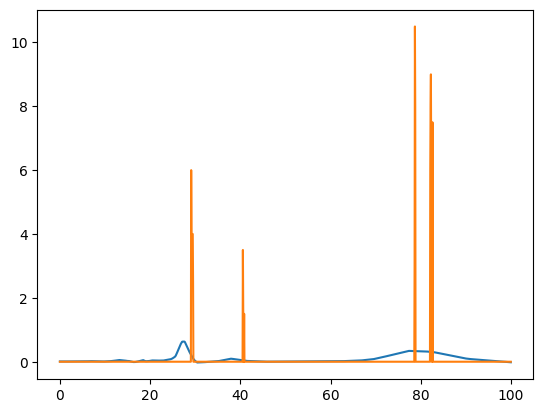

In [58]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time_plot, flow_result)
plt.plot(flow_time_plot, DATASET.Przeplyw.iloc[0:1440])

MODEL B - MODEL A - INPUT(pora dnia) OUTPUT(przepływ)


In [59]:


def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PONIEDZIAŁEK

In [67]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_pon = build_and_compile_model_input(1)

model_pon.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pon=np.arange(0,100,100/1440) 
flow_result_pon = model_pon.predict(flow_time_pon).T

plt.plot(flow_time_pon, flow_result_pon.reshape(1440))

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 0.9729 - mae: 0.2515
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8249 - mae: 0.2068
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8294 - mae: 0.2046
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8170 - mae: 0.1922
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8295 - mae: 0.2041
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8176 - mae: 0.1899
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8224 - mae: 0.1941
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8170 - mae: 0.1882
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8147 - mae: 0.1820
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8167 - mae: 0.1843
Epoch 11/100
 26/144 [====>............

KeyboardInterrupt: 

WTOREK

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 0.6713 - mae: 0.1985
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - mae: 0.1680
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - mae: 0.1765
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - mae: 0.1818
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - mae: 0.1733
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - mae: 0.1560
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - mae: 0.1555
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - mae: 0.1497
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - mae: 0.1555
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - mae: 0.1498
Epoch 11/100
144/144 [=================

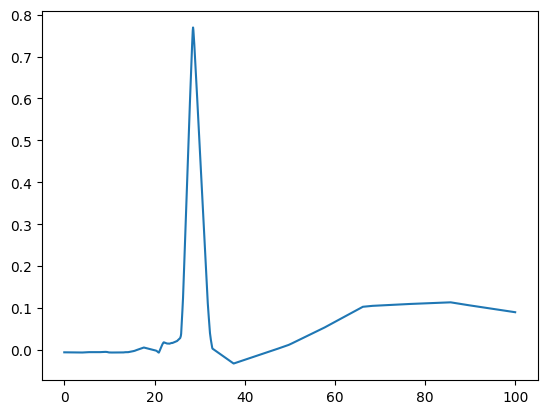

In [61]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_wt = build_and_compile_model_input(1)

model_wt.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_wt=np.arange(0,100,100/1440) 
flow_result_wt = model_wt.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt.reshape(1440))

ŚRODA

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 0.7659 - mae: 0.2081
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7492 - mae: 0.1782
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7559 - mae: 0.1939
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7459 - mae: 0.1794
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7483 - mae: 0.1815
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7444 - mae: 0.1729
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7416 - mae: 0.1696
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7425 - mae: 0.1709
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7412 - mae: 0.1737
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.7407 - mae: 0.1682
Epoch 11/100
144/144 [=================

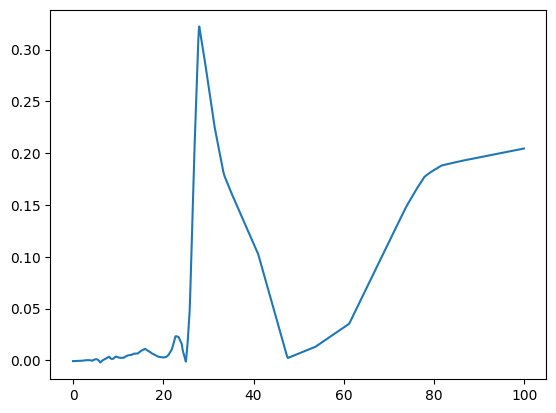

In [62]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_sr = build_and_compile_model_input(1)

model_sr.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sr=np.arange(0,100,100/1440)  
flow_result_sr = model_sr.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr.reshape(1440))

CZWARTEK

Epoch 1/100
144/144 [==============================] - 1s 3ms/step - loss: 0.6938 - mae: 0.2065
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - mae: 0.1957
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - mae: 0.1823
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - mae: 0.1582
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6585 - mae: 0.1539
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - mae: 0.1519
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - mae: 0.1564
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - mae: 0.1500
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - mae: 0.1553
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - mae: 0.1481
Epoch 11/100
144/144 [=================

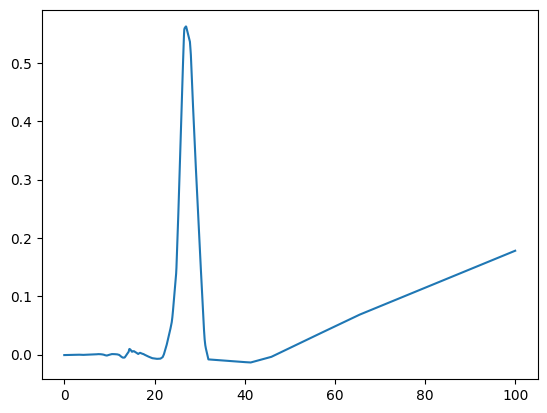

In [63]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_czw = build_and_compile_model_input(1)

model_czw.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_czw=np.arange(0,100,100/1440) 
flow_result_czw = model_czw.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw.reshape(1440))

PIĄTEK

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 0.6426 - mae: 0.2121
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.6041 - mae: 0.1701
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.6120 - mae: 0.1892
Epoch 4/100
144/144 [==============================] - 0s 3ms/step - loss: 0.6070 - mae: 0.1762
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - mae: 0.1689
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - mae: 0.1660
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - mae: 0.1624
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6063 - mae: 0.1719
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5955 - mae: 0.1557
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - mae: 0.1517
Epoch 11/100
144/144 [=================

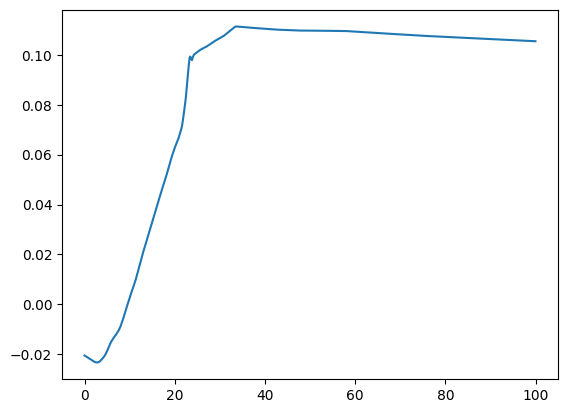

In [64]:
dataset = DATASET

[x,y]=prep_data(dataset,5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_pt = build_and_compile_model_input(1)

model_pt.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pt=np.arange(0,100,100/1440)  
flow_result_pt = model_pt.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt.reshape(1440))

SOBOTA

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 0.6818 - mae: 0.2271
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6096 - mae: 0.1862
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - mae: 0.1698
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6035 - mae: 0.1722
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5980 - mae: 0.1485
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - mae: 0.1530
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5965 - mae: 0.1488
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6001 - mae: 0.1542
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - mae: 0.1444
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - mae: 0.1466
Epoch 11/100
144/144 [=================

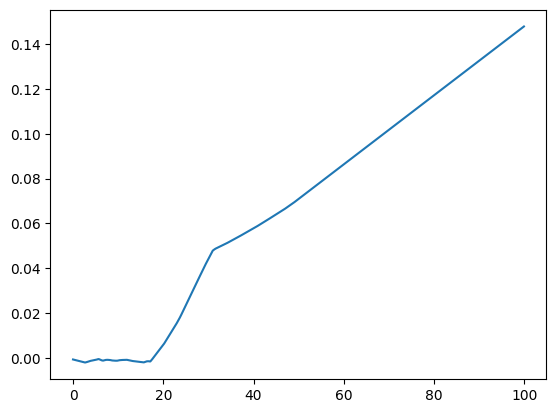

In [65]:
dataset = DATASET

[x,y]=prep_data(dataset,6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_sob = build_and_compile_model_input(1)

model_sob.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sob=np.arange(0,100,100/1440) 
flow_result_sob = model_sob.predict(flow_time_sob)   

plt.plot(flow_time_sob, flow_result_sob.reshape(1440))

NIEDZIELA

In [66]:
dataset = DATASET

[x,y]=prep_data(dataset,7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_nd = build_and_compile_model_input(1)

model_nd.fit(x_train, y_train, epochs=EPOCHS, batch_size=64)

flow_time_nd=np.arange(0,100,100/1440) 
flow_result_nd = model_nd.predict(flow_time_nd)   

plt.plot(flow_time_nd, flow_result_nd.reshape(1440))

Epoch 1/100
288/288 [==============================] - 1s 2ms/step - loss: 0.8887 - mae: 0.2392
Epoch 2/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8640 - mae: 0.2013
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8618 - mae: 0.1976
Epoch 4/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8548 - mae: 0.1870
Epoch 5/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8563 - mae: 0.1845
Epoch 6/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8570 - mae: 0.1867
Epoch 7/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8568 - mae: 0.1895
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8528 - mae: 0.1835
Epoch 9/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8532 - mae: 0.1872
Epoch 10/100
288/288 [==============================] - 0s 2ms/step - loss: 0.8534 - mae: 0.1839
Epoch 11/100
288/288 [=================

KeyboardInterrupt: 

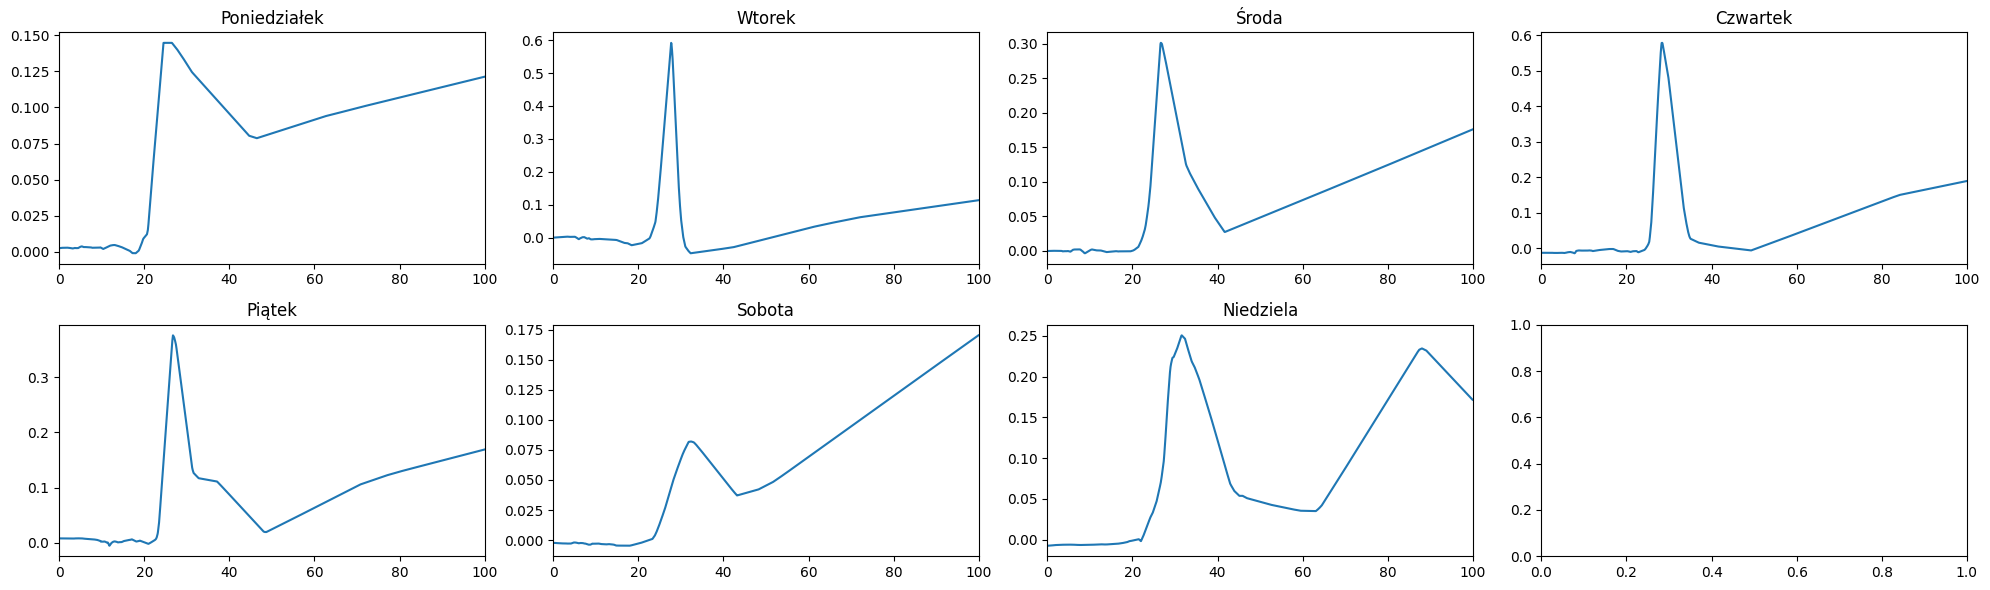

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(1440))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(1440))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(1440))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(1440))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(1440))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(1440))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(1440))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - MODEL A - INPUT(pora roku, dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [ ]:
def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7218 - mae: 0.1844
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7034 - mae: 0.1676
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7001 - mae: 0.1632
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6996 - mae: 0.1635
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7001 - mae: 0.1639
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6996 - mae: 0.1639
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6992 - mae: 0.1646
Epoch 8/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7000 - mae: 0.1635
Epoch 9/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6997 - mae: 0.1640
Epoch 10/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6992 - mae: 0.1644
Epoch 11/100
1008/1

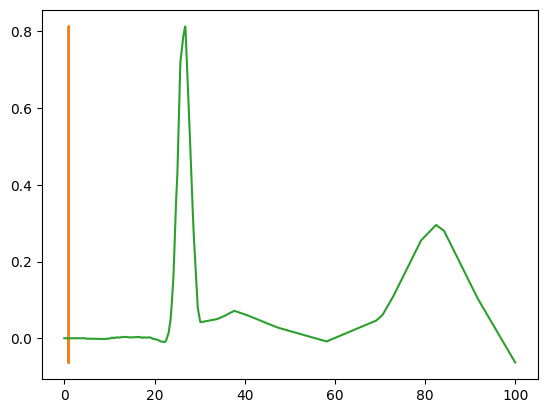

In [ ]:
dataset = DATASET


dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = build_and_compile_model_input(3)


model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)   

plt.plot(flow_time, flow_result)

WIOSNA

Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 403.9523 - mae: 5.2282
Epoch 2/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8750 - mae: 0.3702
Epoch 3/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8417 - mae: 0.3472
Epoch 4/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8717 - mae: 0.3669
Epoch 5/100
252/252 [==============================] - 1s 2ms/step - loss: 0.9116 - mae: 0.3932
Epoch 6/100
252/252 [==============================] - 1s 2ms/step - loss: 1.6633 - mae: 0.7361
Epoch 7/100
252/252 [==============================] - 1s 2ms/step - loss: 4.7000 - mae: 1.0679
Epoch 8/100
252/252 [==============================] - 1s 2ms/step - loss: 1.5143 - mae: 0.7202
Epoch 9/100
252/252 [==============================] - 1s 2ms/step - loss: 2.0766 - mae: 0.8532
Epoch 10/100
252/252 [==============================] - 1s 2ms/step - loss: 6.7884 - mae: 1.7368
Epoch 11/100
252/252 [===============

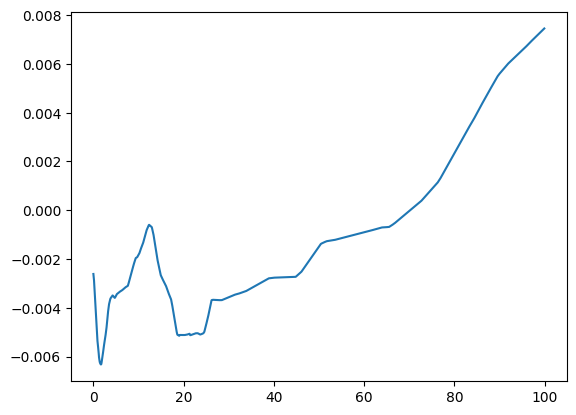

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_spring_plot=np.arange(0,100,100/1440) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring_plot, dtype=int),1*np.ones_like(flow_time_spring_plot, dtype=int),flow_time_spring_plot)).T
flow_result_spring = model.predict(flow_time_spring)   

plt.plot(flow_time_spring_plot, flow_result_spring)

LATO

Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 19.1660 - mae: 1.6439
Epoch 2/100
252/252 [==============================] - 0s 2ms/step - loss: 8.4614 - mae: 1.5709
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 1.9023 - mae: 0.8371
Epoch 4/100
252/252 [==============================] - 1s 2ms/step - loss: 4.1158 - mae: 1.3547
Epoch 5/100
252/252 [==============================] - 1s 2ms/step - loss: 5.5301 - mae: 1.2576
Epoch 6/100
252/252 [==============================] - 0s 2ms/step - loss: 1.1106 - mae: 0.5944
Epoch 7/100
252/252 [==============================] - 1s 2ms/step - loss: 2.2463 - mae: 0.8325
Epoch 8/100
252/252 [==============================] - 1s 2ms/step - loss: 1.8171 - mae: 0.8068
Epoch 9/100
252/252 [==============================] - 1s 2ms/step - loss: 1.3750 - mae: 0.6829
Epoch 10/100
252/252 [==============================] - 1s 2ms/step - loss: 7.2104 - mae: 1.1702
Epoch 11/100
252/252 [================

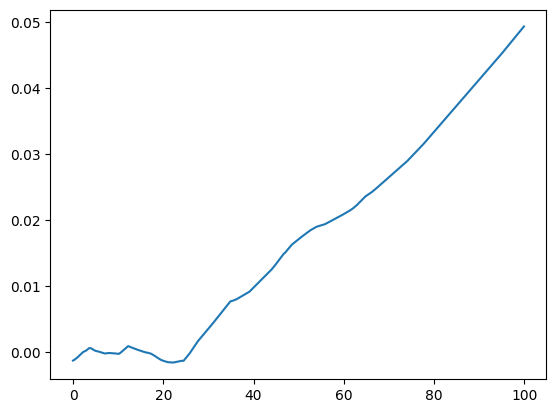

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_summer_plot=np.arange(0,100,100/1440) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer_plot, dtype=int),1*np.ones_like(flow_time_summer_plot, dtype=int),flow_time_summer_plot)).T
flow_result_summer = model.predict(flow_time_summer)   

plt.plot(flow_time_summer_plot, flow_result_summer)

JESIEŃ

Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 155.7509 - mae: 2.4352
Epoch 2/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8269 - mae: 0.3543
Epoch 3/100
252/252 [==============================] - 1s 2ms/step - loss: 1.1643 - mae: 0.4972
Epoch 4/100
252/252 [==============================] - 1s 2ms/step - loss: 1.0604 - mae: 0.4819
Epoch 5/100
252/252 [==============================] - 1s 2ms/step - loss: 1.1557 - mae: 0.5605
Epoch 6/100
252/252 [==============================] - 1s 2ms/step - loss: 2.2744 - mae: 0.8388
Epoch 7/100
252/252 [==============================] - 1s 2ms/step - loss: 1.0094 - mae: 0.4808
Epoch 8/100
252/252 [==============================] - 1s 2ms/step - loss: 1.1787 - mae: 0.5553
Epoch 9/100
252/252 [==============================] - 1s 2ms/step - loss: 1.6313 - mae: 0.7205
Epoch 10/100
252/252 [==============================] - 1s 2ms/step - loss: 1.1283 - mae: 0.5650
Epoch 11/100
252/252 [===============

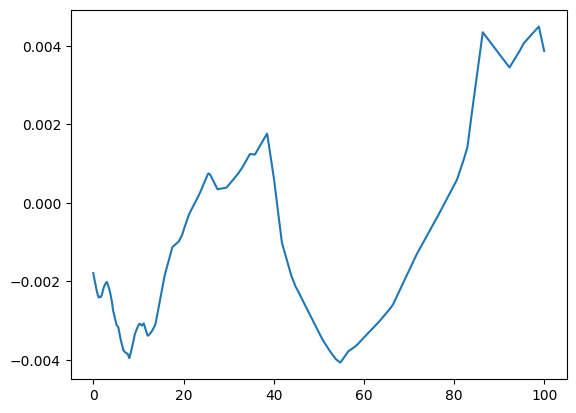

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_fall_plot=np.arange(0,100,100/1440) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model.predict(flow_time_fall)   

plt.plot(flow_time_fall_plot, flow_result_fall)

ZIMA

Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 341.8613 - mae: 3.6402
Epoch 2/100
252/252 [==============================] - 0s 2ms/step - loss: 1.1898 - mae: 0.4822
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 2.3898 - mae: 0.9536
Epoch 4/100
252/252 [==============================] - 0s 2ms/step - loss: 14.4739 - mae: 2.0645
Epoch 5/100
252/252 [==============================] - 0s 2ms/step - loss: 1.8806 - mae: 0.7458
Epoch 6/100
252/252 [==============================] - 1s 2ms/step - loss: 5.4730 - mae: 1.5005
Epoch 7/100
252/252 [==============================] - 0s 2ms/step - loss: 3.2946 - mae: 1.0551
Epoch 8/100
252/252 [==============================] - 1s 2ms/step - loss: 6.7025 - mae: 1.6204
Epoch 9/100
252/252 [==============================] - 1s 2ms/step - loss: 3.4142 - mae: 1.1995
Epoch 10/100
252/252 [==============================] - 1s 2ms/step - loss: 3.4245 - mae: 1.1551
Epoch 11/100
252/252 [==============

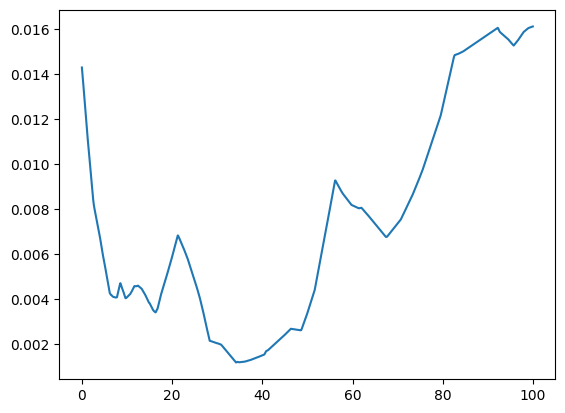

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_winter_plot=np.arange(0,100,100/1440) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter_plot, dtype=int),1*np.ones_like(flow_time_winter_plot, dtype=int),flow_time_winter_plot)).T
flow_result_winter = model.predict(flow_time_winter)   

plt.plot(flow_time_winter_plot, flow_result_winter)

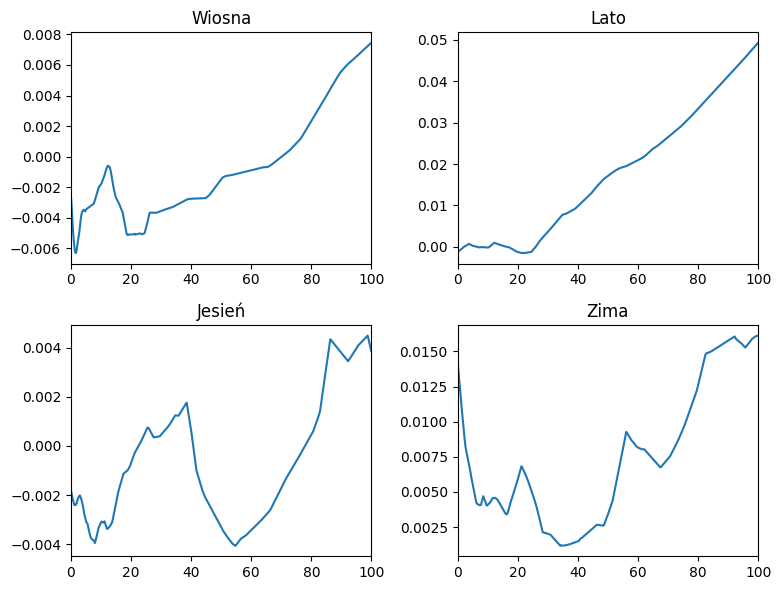

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring_plot, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer_plot, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall_plot, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter_plot, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()

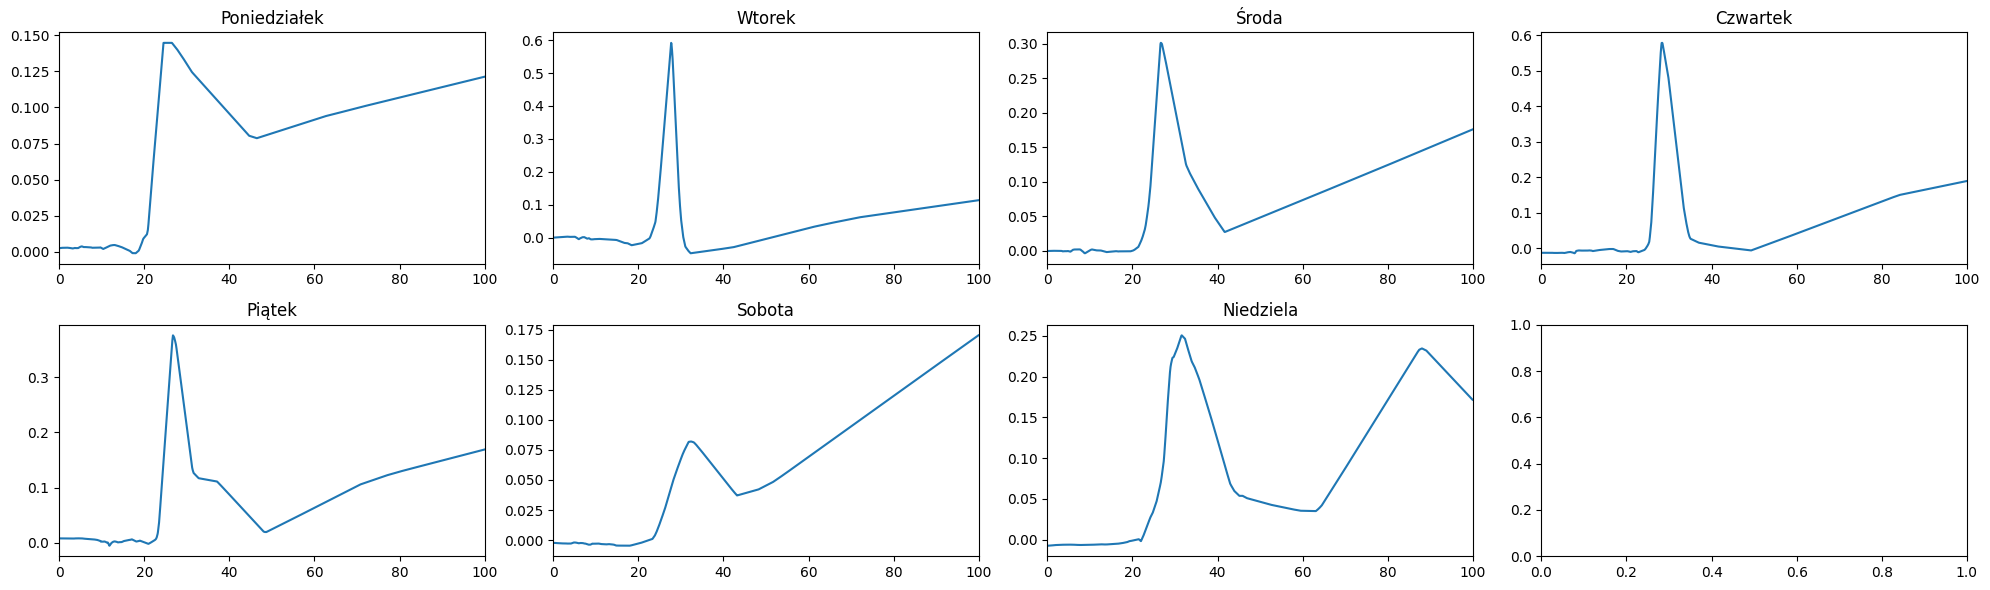

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(1440))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(1440))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(1440))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(1440))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(1440))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(1440))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(1440))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

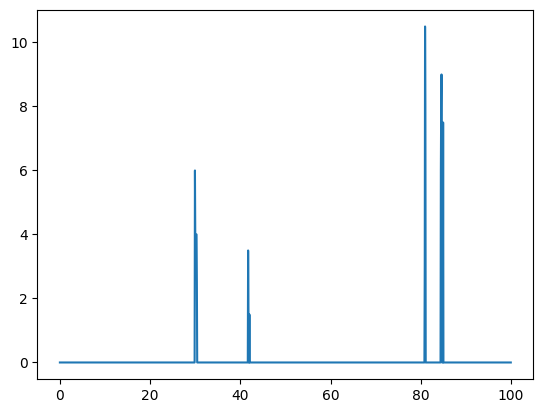

In [ ]:

flow_time=np.arange(0,100,100/1440) 
DATASET.Przeplyw

flow_time

plt.plot(flow_time, DATASET.Przeplyw.iloc[0:1440])